# Boltzmann distribution arising from a *simple* stochastic simulation of QHOs

*D.Kufel, v1.0; 01/10/20*

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

### Simple simulation

We initialize the simulation with exactly uniform distribution of energies among oscillators. Then we allow the  exchange of 1 quantum of energy between two QHOs in each iteration (the one we take energy from needs to have non-zero energy). 

In [2]:
sizexy=20 #size of the grid
Nmax=100000 #number of time steps
x0=1*np.ones((sizexy,sizexy)) #initial configuration: equal quanta distribution
x=[]
x.append(x0)
for t in range(0,Nmax):
    y=np.copy(x[t])
    ypositive=np.argwhere(y>0) #select only such entries which are greater than 0
    choiceA=ypositive[np.random.randint(0,np.shape(ypositive)[0])] #pick some random QHO with non-zero quanta
    y[choiceA[0]][choiceA[1]]-=1 #remove the quanta from one QHO
    choiceB=[np.random.randint(0,sizexy),np.random.randint(0,sizexy)] #pick some random QHO
    y[choiceB[0]][choiceB[1]]+=1 #add the quanta to the other QHO
    x.append(y)

### Plotting quanta distribution on a 2D grid

<IPython.core.display.Javascript object>


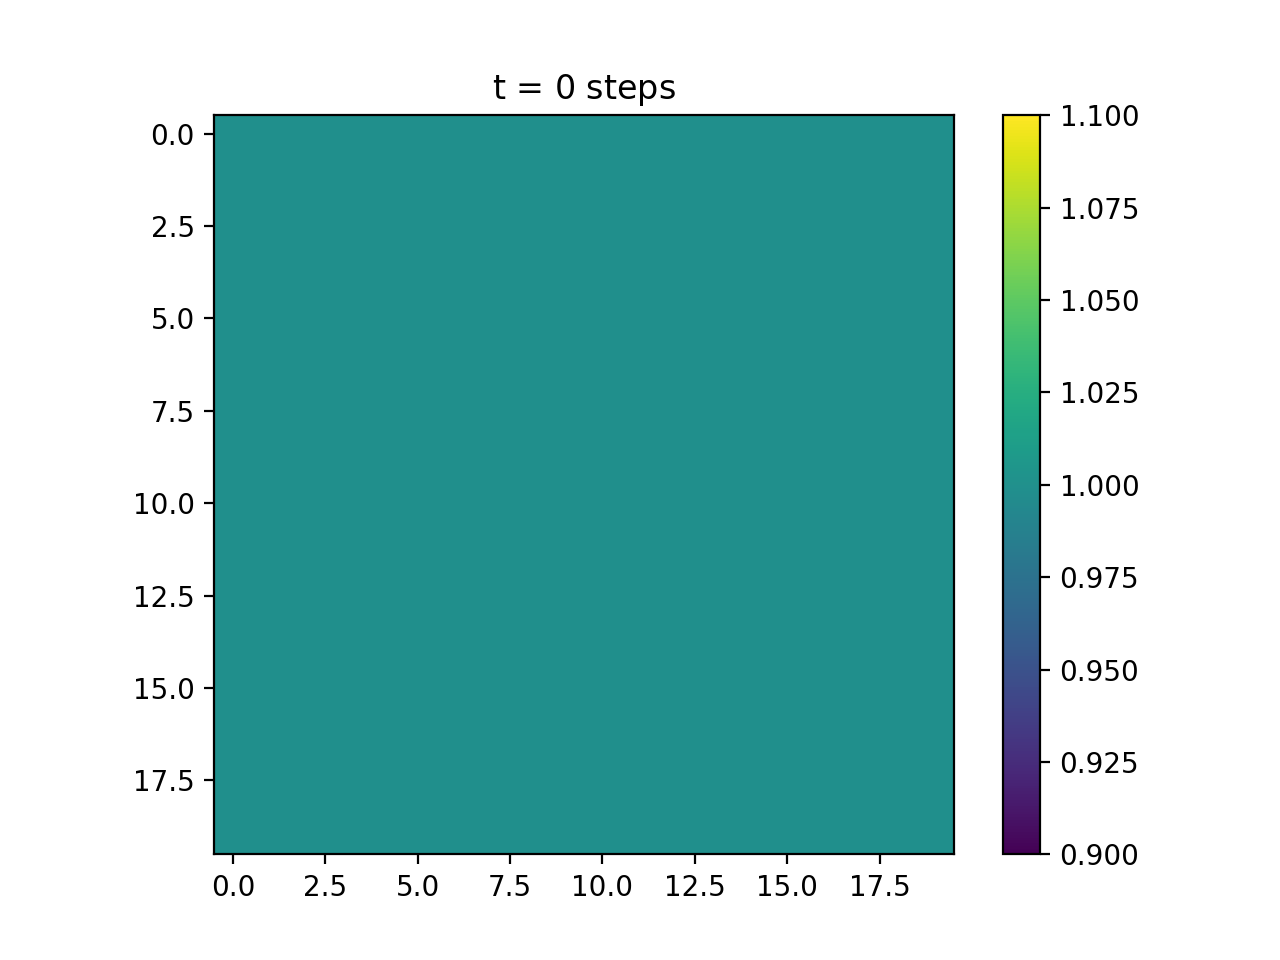

In [3]:
plt.figure()
plt.imshow(x[0])
plt.title('t = $0$ steps')
plt.colorbar()

<IPython.core.display.Javascript object>


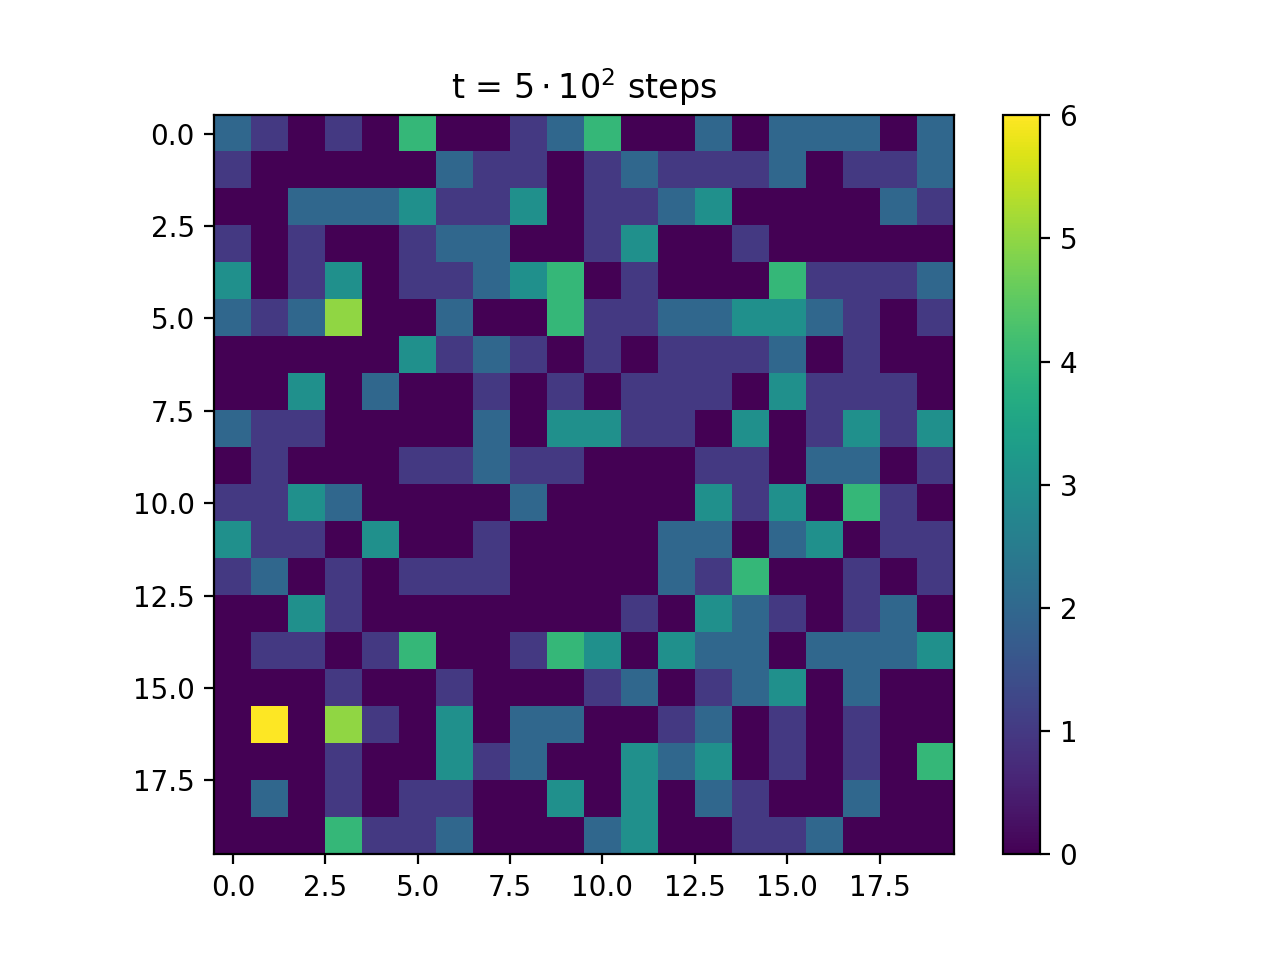

In [4]:
plt.figure()
plt.imshow(x[500])
plt.title('t = $5 \cdot 10^2$ steps')
plt.colorbar()

<IPython.core.display.Javascript object>


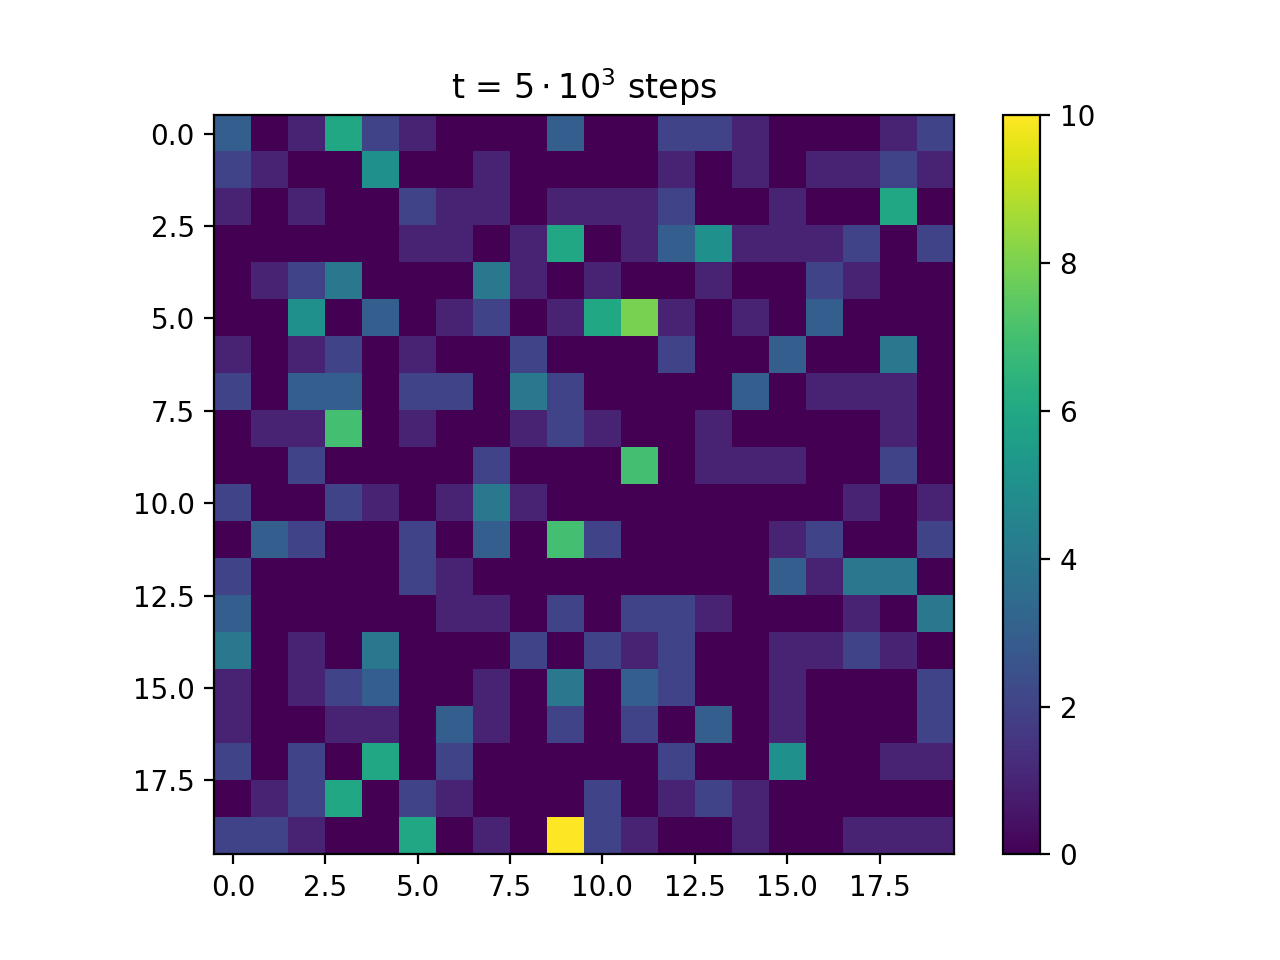

In [5]:
plt.figure()
plt.imshow(x[5000])
plt.title('t = $5 \cdot 10^3$ steps')
plt.colorbar()

<IPython.core.display.Javascript object>


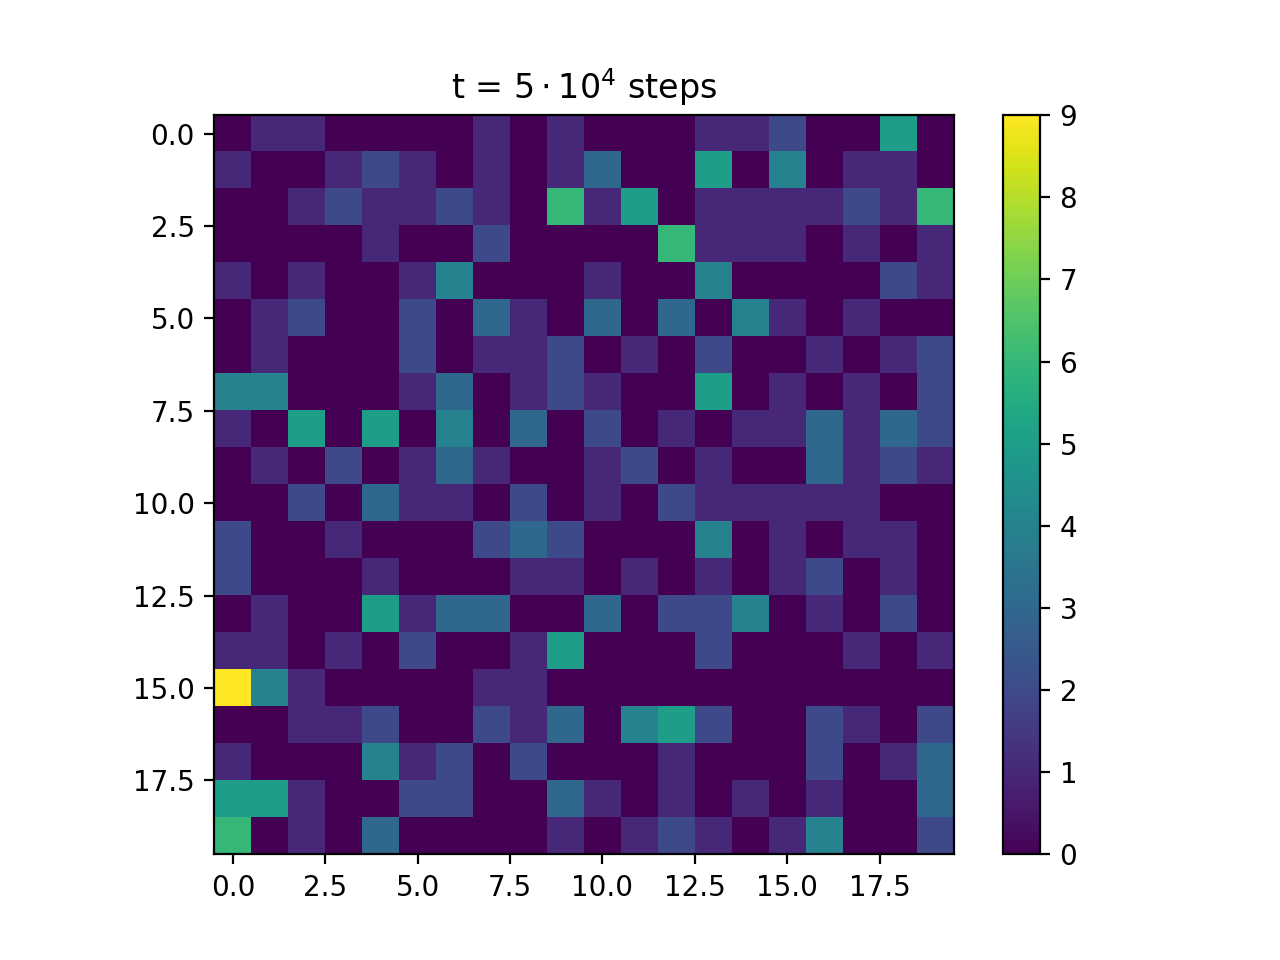

In [6]:
plt.figure()
plt.imshow(x[50000])
plt.title('t = $5 \cdot 10^4$ steps')
plt.colorbar()

<IPython.core.display.Javascript object>


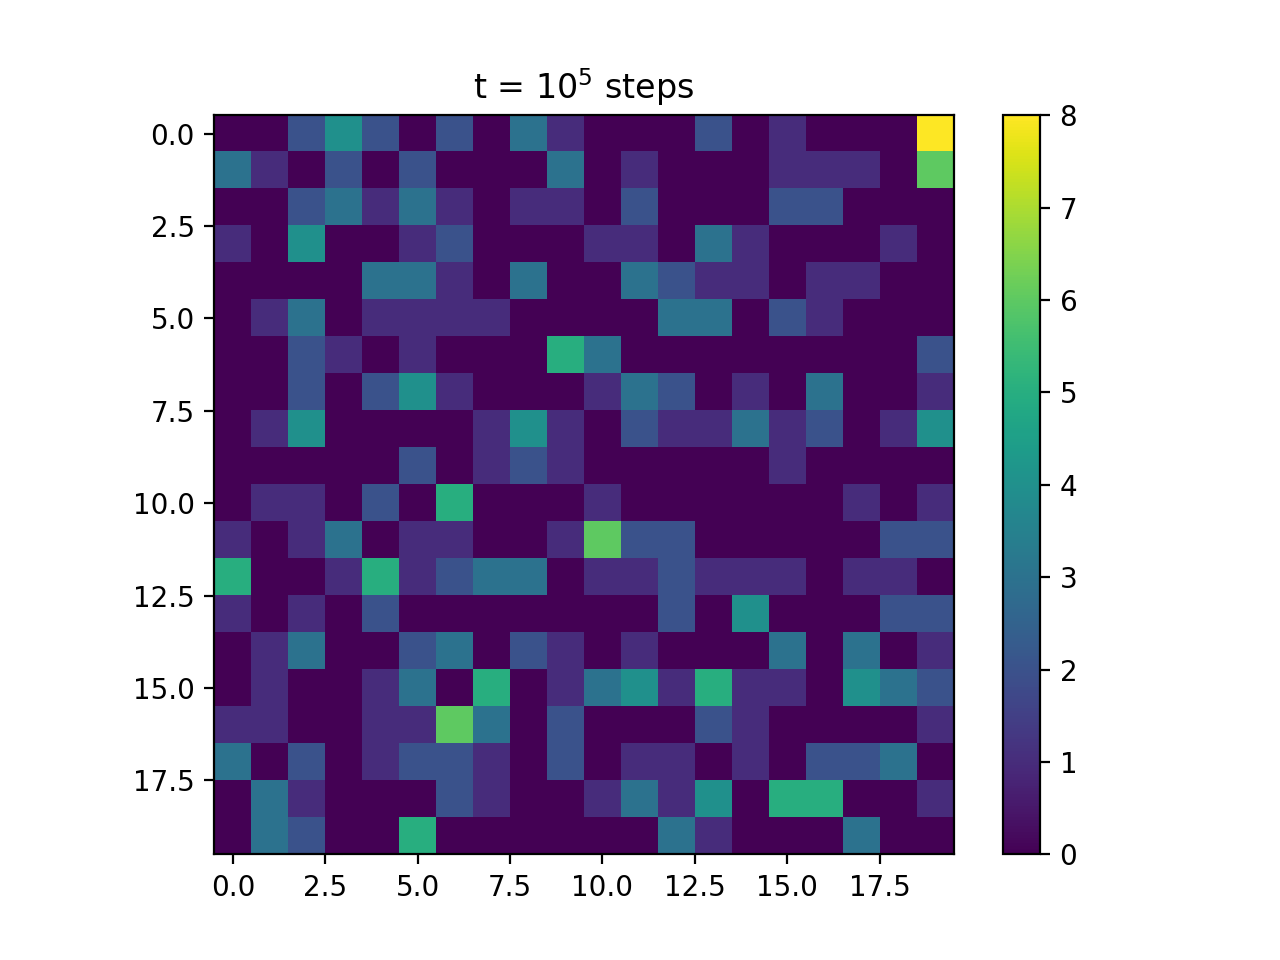

In [7]:
plt.figure()
plt.imshow(x[100000])
plt.title('t = $10^5$ steps')
plt.colorbar()

### Plotting histograms of the quanta distribution

<IPython.core.display.Javascript object>


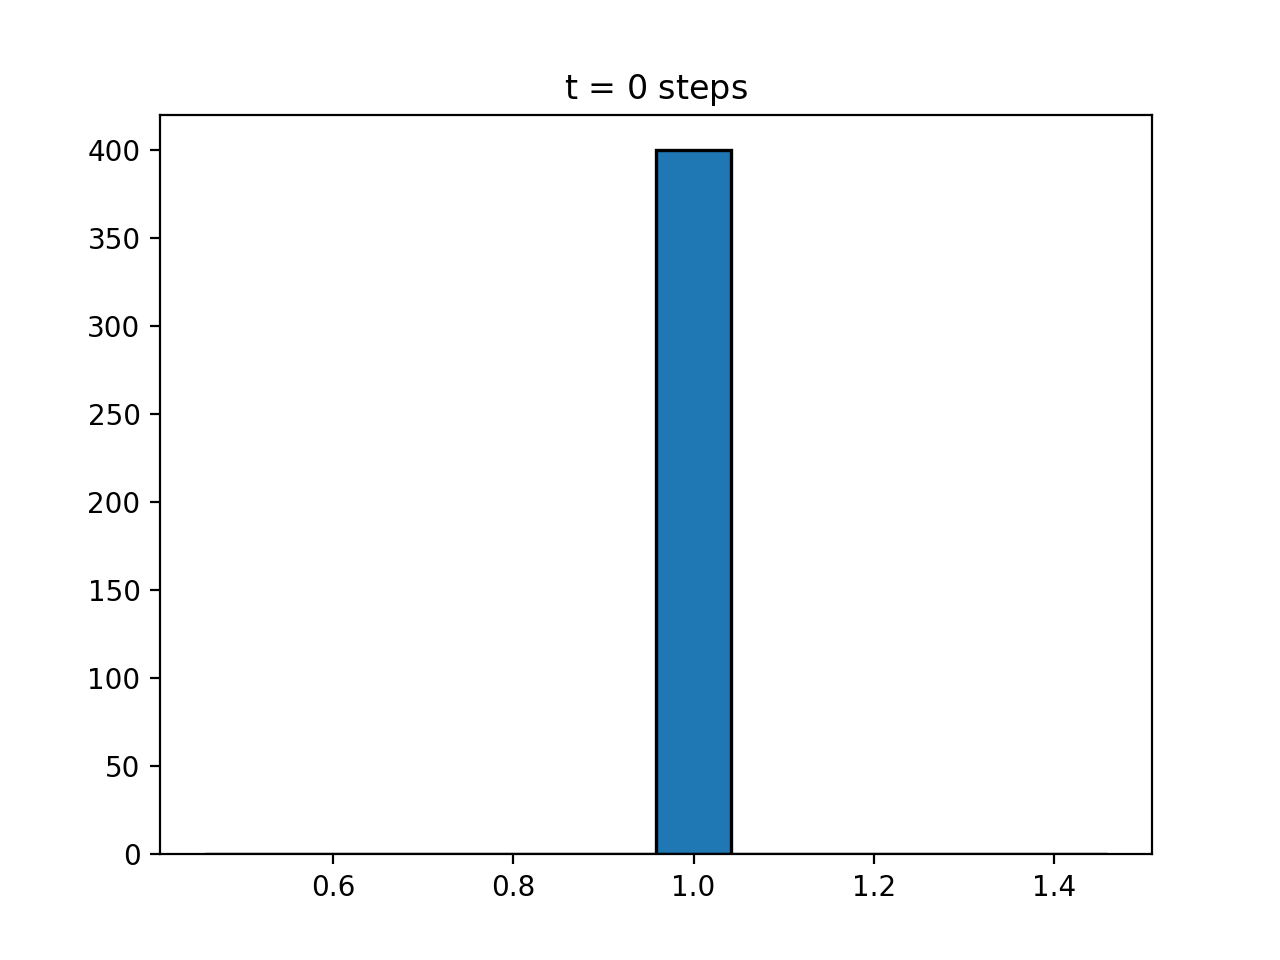

(array([  0.,   0.,   0.,   0.,   0.,   0., 400.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
        0.91666667, 1.        , 1.08333333, 1.16666667, 1.25      ,
        1.33333333, 1.41666667, 1.5       ]),
 <a list of 12 Patch objects>)

In [8]:
plt.figure()
plt.title('t = $0$ steps')
plt.hist(x[0].flatten(),align='left',bins=12,edgecolor='black',linewidth=1.2)

<IPython.core.display.Javascript object>


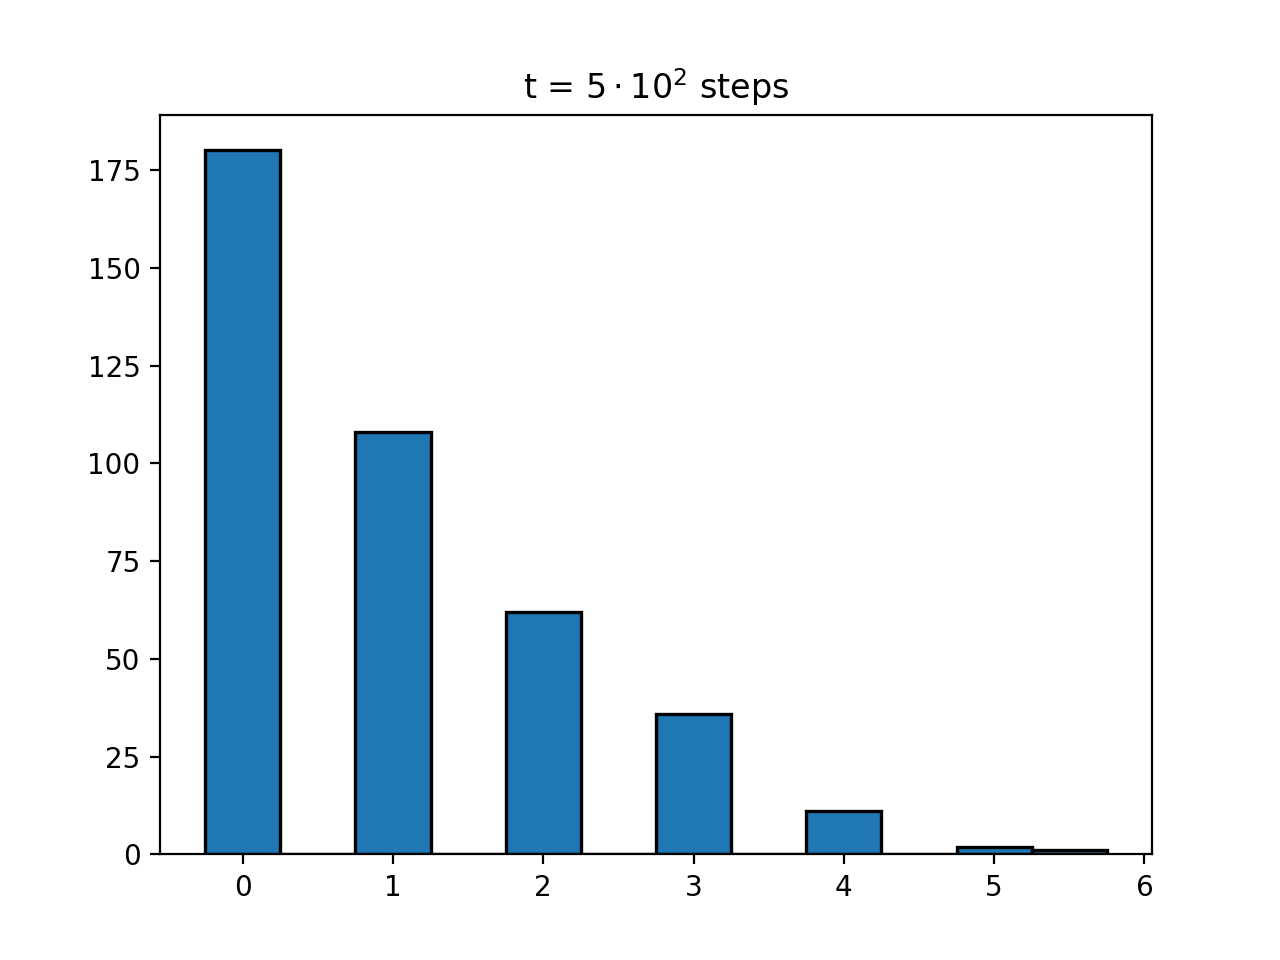

(array([180.,   0., 108.,   0.,  62.,   0.,  36.,   0.,  11.,   0.,   2.,
          1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 12 Patch objects>)

In [9]:
plt.figure()
plt.title('t = $5 \cdot 10^2$ steps')
plt.hist(x[500].flatten(),align='left',bins=12,edgecolor='black',linewidth=1.2)

<IPython.core.display.Javascript object>


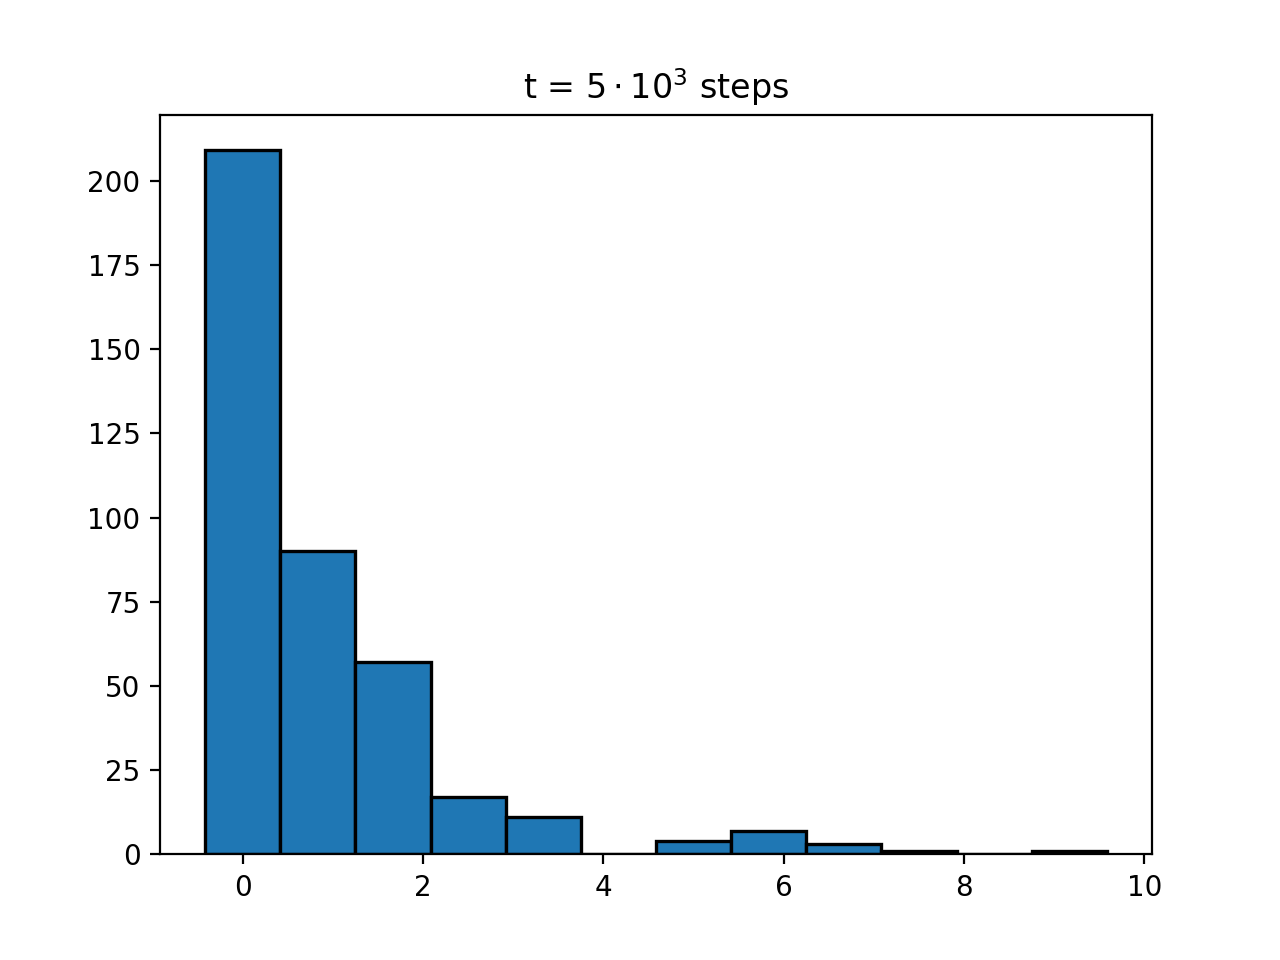

(array([209.,  90.,  57.,  17.,  11.,   0.,   4.,   7.,   3.,   1.,   0.,
          1.]),
 array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
         4.16666667,  5.        ,  5.83333333,  6.66666667,  7.5       ,
         8.33333333,  9.16666667, 10.        ]),
 <a list of 12 Patch objects>)

In [10]:
plt.figure()
plt.title('t = $5 \cdot 10^3$ steps')
plt.hist(x[5000].flatten(),align='left',bins=12,edgecolor='black',linewidth=1.2)

<IPython.core.display.Javascript object>


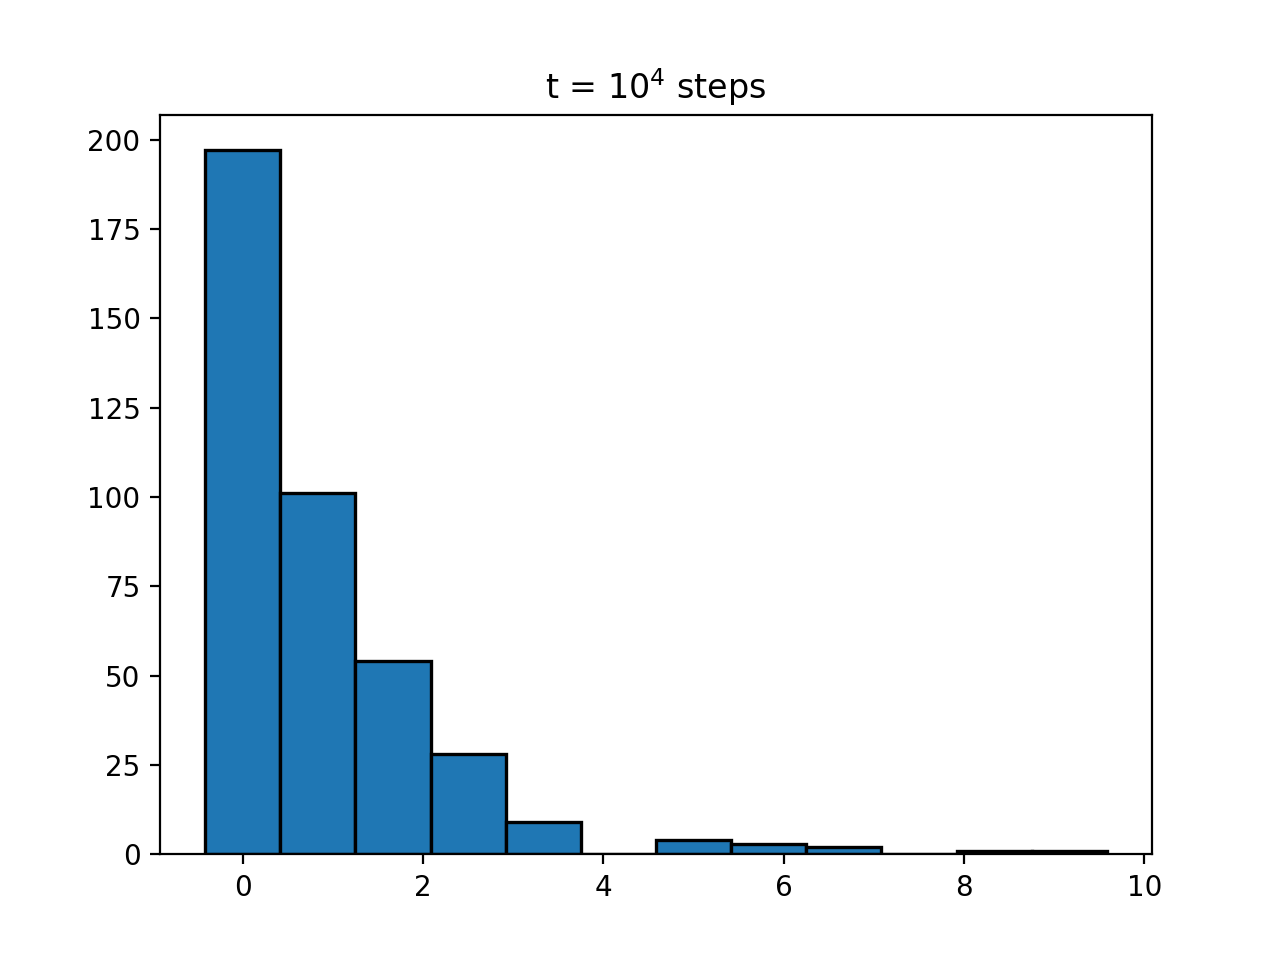

(array([197., 101.,  54.,  28.,   9.,   0.,   4.,   3.,   2.,   0.,   1.,
          1.]),
 array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
         4.16666667,  5.        ,  5.83333333,  6.66666667,  7.5       ,
         8.33333333,  9.16666667, 10.        ]),
 <a list of 12 Patch objects>)

In [11]:
plt.figure()
plt.title('t = $10^4$ steps')
plt.hist(x[10000].flatten(),align='left',bins=12,edgecolor='black',linewidth=1.2)

<IPython.core.display.Javascript object>


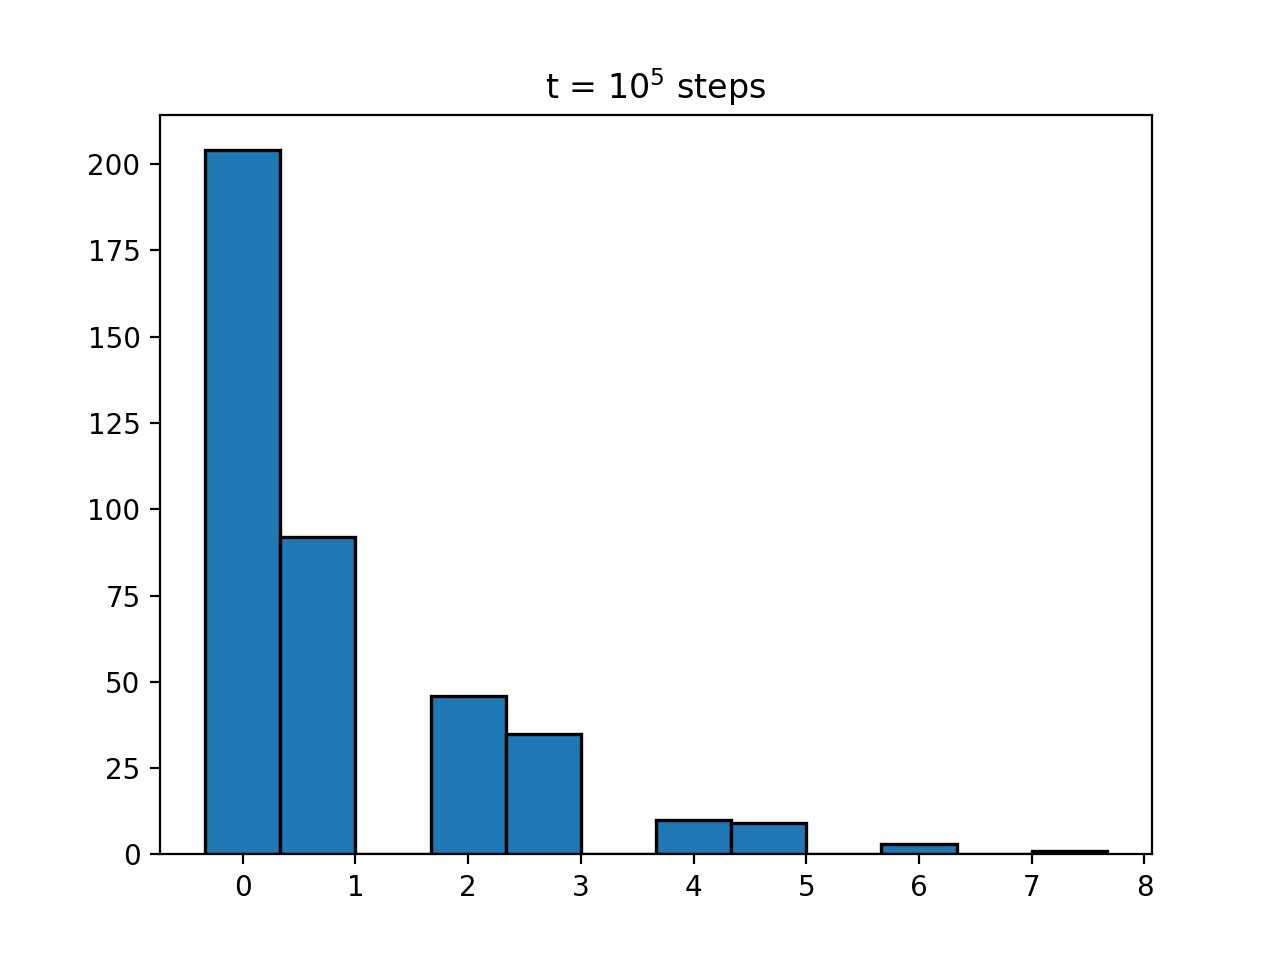

(array([204.,  92.,   0.,  46.,  35.,   0.,  10.,   9.,   0.,   3.,   0.,
          1.]),
 array([0.        , 0.66666667, 1.33333333, 2.        , 2.66666667,
        3.33333333, 4.        , 4.66666667, 5.33333333, 6.        ,
        6.66666667, 7.33333333, 8.        ]),
 <a list of 12 Patch objects>)

In [12]:
plt.figure()
plt.title('t = $10^5$ steps')
plt.hist(x[100000].flatten(),align='left',bins=12,edgecolor='black',linewidth=1.2)

### List of possible experiments

1. Fit the exponentials to the histograms to indeed confirm that they follow exponential distribution. 

2. Modify x0 to represent an array of 3's instead of 1's. Observe what happens with the x[Nmax] histogram. Modify the code to plot them together: plt.hist(...,color='red',alpha=0.5) option may be useful. **Hint**: what is the effect of temperature on decay width of the exponential? Note that multiplication of x0 by constant $c$ increases the mean energy by $c$ (from intial value $1$).

3. Here we claim that the combined system+reservoir is isolated and may be considered as microcanonical ensemble. Show the place in the code of the above simulation which ensures this and also verify it empirically (np.mean(array) may be useful).  

4. Add some additional constraints to a system, for example: not every QHO can exchange energy with every other, but there exists a certain interaction range r. Some brute-force method should be easy to code. For more efficient implementation you may read about e.g. Verlet list.

5. (difficult) How to roughly estimate the number of iterations required to reach the equilibrium state described by the Boltzmann factor? 